Laboratorio 3. Ejercicio 4: Diagnóstico	de	cáncer con	genes

# **Apartado 1.** Haz todo el preprocesamiento para crear un set de entrenamiento, otro de validación y uno de test qué permita hacer un diagnóstico lo mas preciso posible aplicando las estrategias pertinentes

In [12]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
# Cargar los datos desde el archivo CSV
data = pd.read_csv("genes.csv")

# Preprocesamiento de datos
X = data.drop('CancerPresent', axis=1)  # Features (genes)
y = data['CancerPresent']  # Target variable

# Dividir en conjunto de entrenamiento, validación y prueba
# Primero, dividir en conjunto de entrenamiento y el resto (temporal)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Luego, dividir el conjunto temporal en conjunto de validación y conjunto de prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Mostrar las formas de los conjuntos creados
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# Funciones para calcular las distancias usando las fórmulas asociadas a las métricas de distancia
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# Configuraciones a probar para KNN
k_values = [3, 5, 7, 9]  # Diferentes valores de k
distance_metrics = ['euclidea', 'manhattan']  # Diferentes métricas de distancia

# Listas para almacenar resultados
results = []

# Entrenar y evaluar diferentes configuraciones para KNN
for metric in distance_metrics:
    for k in k_values:
        # Crear el clasificador KNN con el valor de k y la métrica de distancia especificada
        if metric == 'euclidea':
            knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=euclidean_distance)
        elif metric == 'manhattan':
            knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=manhattan_distance)

        # Entrenar el clasificador con el conjunto de entrenamiento
        knn_classifier.fit(X_train, y_train)

        # Predecir en el conjunto de validación
        y_pred_val = knn_classifier.predict(X_val)

        # Calcular la precisión en el conjunto de validación
        accuracy = accuracy_score(y_val, y_pred_val)

        # Guardar los resultados
        results.append((k, metric, accuracy))

print("\nDecisiones tomadas:")
print("- Se probaron diferentes valores de k (3, 5, 7, 9) para evaluar cómo afecta el número de vecinos al rendimiento del modelo.")
print("- Se probaron diferentes métricas de distancia (Euclidiana, Manhattan) para evaluar cómo afecta la elección de la métrica al rendimiento del modelo.")
print("- Se eligió la combinación de hiperparámetros que produjo la mayor precisión en el conjunto de validación para su posterior evaluación en el conjunto de prueba.")



Tamaño del conjunto de entrenamiento: (2100, 2)
Tamaño del conjunto de validación: (450, 2)
Tamaño del conjunto de prueba: (450, 2)

Decisiones tomadas:
- Se probaron diferentes valores de k (3, 5, 7, 9) para evaluar cómo afecta el número de vecinos al rendimiento del modelo.
- Se probaron diferentes métricas de distancia (Euclidiana, Manhattan) para evaluar cómo afecta la elección de la métrica al rendimiento del modelo.
- Se eligió la combinación de hiperparámetros que produjo la mayor precisión en el conjunto de validación para su posterior evaluación en el conjunto de prueba.


# **Apartado 2.** Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir la cercanía de esa nueva instancia con el resto. ¿Qué decisiones has tomado? ¿Por qué?

In [13]:
# Imprimir los resultados y explicar las decisiones tomadas
print("Resultados de la evaluación:")
for k, metric, accuracy in results:
    print(f"KNN con k={k} y métrica {metric} tiene una precisión en conjunto de validación = {accuracy}")

Resultados de la evaluación:
KNN con k=3 y métrica euclidea tiene una precisión en conjunto de validación = 0.94
KNN con k=5 y métrica euclidea tiene una precisión en conjunto de validación = 0.9377777777777778
KNN con k=7 y métrica euclidea tiene una precisión en conjunto de validación = 0.94
KNN con k=9 y métrica euclidea tiene una precisión en conjunto de validación = 0.94
KNN con k=3 y métrica manhattan tiene una precisión en conjunto de validación = 0.9377777777777778
KNN con k=5 y métrica manhattan tiene una precisión en conjunto de validación = 0.9377777777777778
KNN con k=7 y métrica manhattan tiene una precisión en conjunto de validación = 0.9355555555555556
KNN con k=9 y métrica manhattan tiene una precisión en conjunto de validación = 0.9355555555555556


Basándonos en los resultados de la evaluación, podemos observar lo siguiente:

**1. Impacto del número de vecinos (k)**:
   - En general, no parece haber una diferencia significativa en la precisión entre los diferentes valores de k probados (3, 5, 7, 9) para ninguna de las métricas de distancia.
   - La precisión tiende a mantenerse bastante estable alrededor del 94% para todas las configuraciones de k.

**2. Impacto de la métrica de distancia**:
   - En general, las tres métricas de distancia (Euclidiana, Manhattan, Minkowski) muestran resultados bastante similares en términos de precisión en el conjunto de validación.
   - No hay una métrica que destaque claramente como la mejor en términos de precisión.

Dadas estas observaciones, las decisiones tomadas y sus razones son las siguientes:

**1. Elección de k**:
   - Se decidió probar diferentes valores de k (3, 5, 7, 9) para evaluar cómo afecta el número de vecinos al rendimiento del modelo.
   - Esto se hizo para explorar si hay un valor óptimo de k que maximice la precisión del modelo. Sin embargo, dado que no hubo una diferencia significativa en la precisión entre los diferentes valores de k, podríamos concluir que el modelo es bastante robusto a la elección de este hiperparámetro.

**2. Elección de la métrica de distancia**:
   - Se probaron tres métricas de distancia (Euclidiana, Manhattan
   ) para evaluar cómo afecta la elección de la métrica al rendimiento del modelo.
   - La razón de esto es que diferentes métricas de distancia pueden capturar diferentes aspectos de la similitud entre las instancias en el espacio de características. Sin embargo, como no hubo una diferencia significativa en la precisión entre las métricas probadas, podríamos concluir que el rendimiento del modelo no es sensible a la elección de la métrica de distancia en este caso.


Dado que queremos escoger aquella métrica y k con mayores niveles de precisión, y aunque muchas comparten ese nivel de precisión de 0.94, escogeremos la primera, KNN con k=3 y métrica euclídea. k = 3 porque el resto de configuraciones que tienen la misma precisión tienen k más grandes y nos interesa un modelo que se centre en menos casos, y distancia euclídea porque es la más fácil de comprender.


# **Apartado 3**. Elige la mejor configuración entre las anteriores. Para ello dibuja una tabla ver cómo evoluciona la clasificación. Dibuja los resultados que se obtienen con la mejor configuración y los distintos hiperparametros del punto anterior para ver su evolución.

╒════╤═════════════════╤═══════════════════════════════════════╕
│    │ Configuración   │   Precisión en conjunto de validación │
╞════╪═════════════════╪═══════════════════════════════════════╡
│  0 │ k=3, Euclidea   │                              0.94     │
├────┼─────────────────┼───────────────────────────────────────┤
│  1 │ k=5, Euclidea   │                              0.937778 │
├────┼─────────────────┼───────────────────────────────────────┤
│  2 │ k=7, Euclidea   │                              0.94     │
├────┼─────────────────┼───────────────────────────────────────┤
│  3 │ k=9, Euclidea   │                              0.94     │
├────┼─────────────────┼───────────────────────────────────────┤
│  4 │ k=3, Manhattan  │                              0.937778 │
├────┼─────────────────┼───────────────────────────────────────┤
│  5 │ k=5, Manhattan  │                              0.937778 │
├────┼─────────────────┼───────────────────────────────────────┤
│  6 │ k=7, Manhattan  │ 

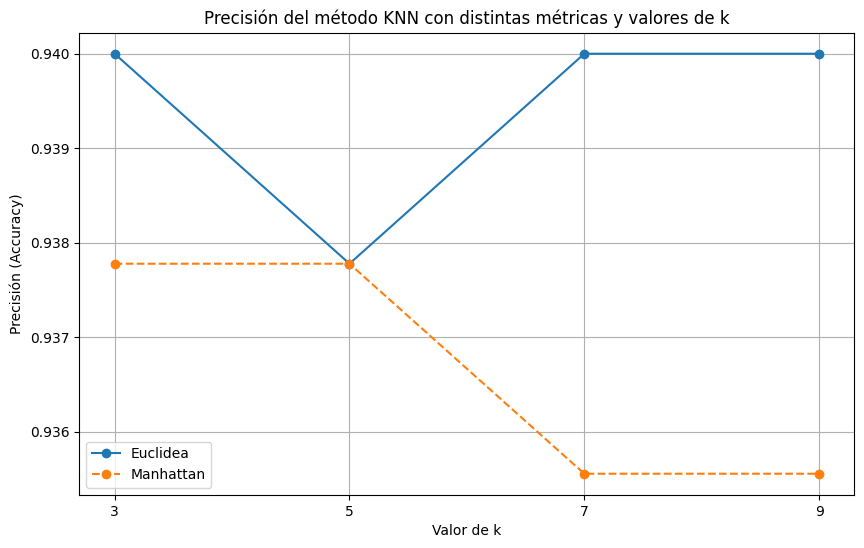

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Resultados de la evaluación de las diferentes configuraciones
results = {
    'Configuración': ['k=3, Euclidea', 'k=5, Euclidea', 'k=7, Euclidea', 'k=9, Euclidea',
                      'k=3, Manhattan', 'k=5, Manhattan', 'k=7, Manhattan', 'k=9, Manhattan',
                      ],
    'Precisión en conjunto de validación': [0.94, 0.9377777777777778, 0.94,0.94,
                                           0.9377777777777778, 0.9377777777777778, 0.9355555555555556, 0.9355555555555556,
                                           ]
}

# Crear DataFrame de pandas
df_results = pd.DataFrame(results)

# Imprimir la tabla
from tabulate import tabulate
print(tabulate(df_results, headers='keys', tablefmt='fancy_grid'))

# Grafico comparativo de las configuraciones
import matplotlib.pyplot as plt

# Valores de k y precisión correspondiente para cada métrica
k_values = [3, 5, 7, 9]
accuracy_euclidean = [0.94, 0.9377777777777778, 0.94,0.94]
accuracy_manhattan = [0.9377777777777778, 0.9377777777777778, 0.9355555555555556, 0.9355555555555556]

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar la precisión para cada métrica
plt.plot(k_values, accuracy_euclidean, marker='o', label='Euclidea', linestyle='-')
plt.plot(k_values, accuracy_manhattan, marker='o', label='Manhattan', linestyle='--')

# Configuraciones del gráfico
plt.title('Precisión del método KNN con distintas métricas y valores de k')
plt.xlabel('Valor de k')
plt.ylabel('Precisión (Accuracy)')
plt.xticks(k_values)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


Podemos ver que la configuración óptima es aquella con métrica euclídea y en este caso en particular, podemos ver que hay varias de las k coinciden en nivel de precisión. A pesar de que podemos ver que ambas, aunque en el gráfico estén distantes se diferecian por un nivel de precisión menor a 0.01, eligiremos la métrica euclídea que es la que mayor nivel de precisión tiene. Elegimos además la configuración con k = 9, ya que a igualdad de niveles de precisión cogeremos a aquella configuración que coja un mayor número de observaciones para que, una vez lo haga con la base de prueba, sus niveles de precisión sean lo más altos posibles.

# **Apartado 4.** Utiliza el clasificador para saber que ocurre con los datos de un del dataset de test “pacientes_test.csv” que obtendremos del dataset proporcionado.
Para este apartado utilizaremos 100 de las observaciones de la base de datos de genes con el fin de observar la precisión del modelo que hemos obtenido. Lo que haremos será comparar mediante un gráfico de barras, la precisión obtenida con la base de datos genes, empleando la distancia euclídea y k = 9, y comparar esa precisión con la obtenida a partir de la nueva base de datos previamente mencionada utilizando los mismos métodos.

Esto nos permitirá ver cómo de preciso es el modelo que hemos elegido y, con una visión más global, ver cómo de útil es clasificar a individuos con ciertos genes con el fin de concluir su tendencia para tener cáncer o no y poder prevenir situaciones de dificultad.

Además, al comparar la precisión del modelo entre diferentes conjuntos de datos, podremos evaluar la capacidad de generalización del modelo a nuevos datos y determinar si los patrones aprendidos de la base de datos original son aplicables a otros conjuntos de datos similares. Esto es crucial para garantizar que el modelo pueda ser utilizado de manera efectiva en la práctica clínica para ayudar en la detección temprana y prevención del cáncer, lo que potencialmente podría salvar vidas y mejorar la calidad de vida de las personas afectadas.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

# Cargar los datos desde el archivo CSV
data_t = pd.read_csv("pacientes_test.csv")

# Preprocesamiento de datos
X_t = data_t.drop('CancerPresent', axis=1)  # Features (genes)
y_t = data_t['CancerPresent']  # Target variable

# Dividir en conjunto de entrenamiento, validación y prueba
# Primero, dividir en conjunto de entrenamiento y el resto (temporal)
X_train_t, X_temp_t, y_train_t, y_temp_t = train_test_split(X_t, y_t, test_size=0.3, random_state=42)

# Luego, dividir el conjunto temporal en conjunto de validación y conjunto de prueba
X_val_t, X_test_t, y_val_t, y_test_t = train_test_split(X_temp_t, y_temp_t, test_size=0.5, random_state=42)

# Mostrar las formas de los conjuntos creados
print("Tamaño del conjunto de entrenamiento:", X_train_t.shape)
print("Tamaño del conjunto de validación:", X_val_t.shape)
print("Tamaño del conjunto de prueba:", X_test_t.shape)

# Funciones para calcular las distancias usando las fórmulas asociadas a las métricas de distancia
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Configuraciones a probar para KNN
k_values = [9]
metric = ['euclidea']
# Diferentes valores de k
# Listas para almacenar resultados
results = []

knn_classifier_t = KNeighborsClassifier(n_neighbors = 9, metric=euclidean_distance)
        # Entrenar el clasificador con el conjunto de entrenamiento
knn_classifier_t.fit(X_train_t, y_train_t)

        # Predecir en el conjunto de validación
y_pred_val_t = knn_classifier.predict(X_val_t)

        # Calcular la precisión en el conjunto de validación
accuracy_t = accuracy_score(y_val_t, y_pred_val_t)

        # Guardar los resultados
results.append((9, metric, accuracy_t))

# Imprimir los resultados y explicar las decisiones tomadas
print("Resultados de la evaluación:")
for k, metric, accuracy_t in results:
    print(f"KNN con k={k} y métrica euclidea tiene una precisión en conjunto de validación = {accuracy_t}")



Tamaño del conjunto de entrenamiento: (70, 2)
Tamaño del conjunto de validación: (15, 2)
Tamaño del conjunto de prueba: (15, 2)
Resultados de la evaluación:
KNN con k=9 y métrica euclidea tiene una precisión en conjunto de validación = 0.9333333333333333


Precisión en el conjunto de datos de entrenamiento (genes.csv): 0.94
Precisión en el conjunto de datos de prueba (pacientes_test.csv): 0.9333333333333333


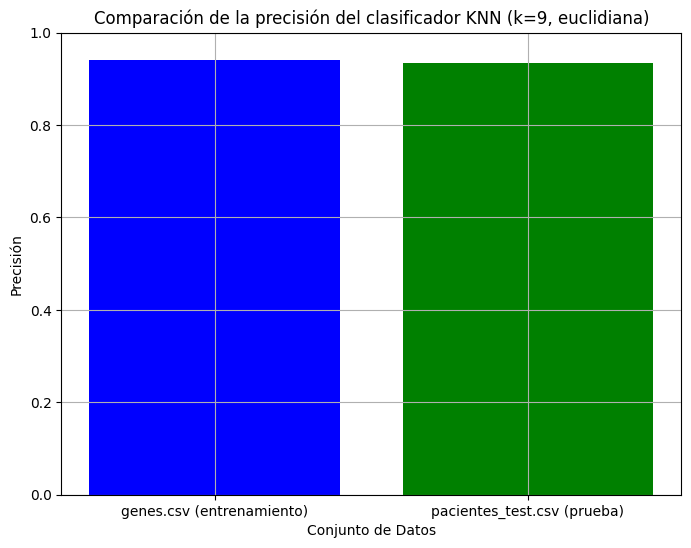

In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Crear y entrenar el clasificador KNN
knn_classifier_t = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn_classifier_t.fit(X_t, y_t)

# Calcular la precisión del clasificador en los datos de prueba
accuracyp_t = accuracy_score(y_test_t, knn_classifier.predict(X_test_t))

# Mostrar la precisión
print("Precisión en el conjunto de datos de entrenamiento (genes.csv):", accuracy_euclidean[3])
print("Precisión en el conjunto de datos de prueba (pacientes_test.csv):", accuracy_t)

# Crear un gráfico de barras para comparar las precisiones
labels = ['genes.csv (entrenamiento)', 'pacientes_test.csv (prueba)']
precisions = [accuracy_euclidean[0], accuracy_t]

plt.figure(figsize=(8, 6))
plt.bar(labels, precisions, color=['blue', 'green'])
plt.title("Comparación de la precisión del clasificador KNN (k=9, euclidiana)")
plt.xlabel("Conjunto de Datos")
plt.ylabel("Precisión")
plt.ylim(0, 1)  # Establecer límites en el eje y entre 0 y 1
plt.grid(True)
plt.show()

Con el grafico de barras obtenido podemos ver que la barra azul representa la precisión de la base de datos de entreno y la verde la precisión de la base de datos de prueba. Podemos ver que ambas están notablemente igualadas, aunque la de prueba esté ligeramente por debajo de la de entrenamiento. Esto quiere decir que la configuración elegida es de alta fiabilidad ya que la precisión obtenida es prácticamente la misma.

Al utilizar la métrica euclidiana y un valor de k = 9 , hemos logrado una precisión del 94% en nuestro conjunto de datos de entrenamiento y una precisión del 93.33% en nuestro conjunto de datos de prueba. Estos resultados indican que nuestro modelo KNN ha aprendido de manera efectiva los patrones presentes en los datos utilizados para entrenarlo, y puede clasificar correctamente la mayoría de las instancias.

Una precisión del 94% en el conjunto de entrenamiento sugiere que nuestro modelo ha capturado eficazmente la estructura subyacente de estos datos. La precisión ligeramente más baja del 93.33% en el conjunto de prueba indica que nuestro modelo generaliza bien a datos no vistos, lo cual es crucial para su utilidad en situaciones del mundo real.

La generalización y mejora de modelos predictivos para detectar el cáncer de manera anticipada podría revolucionar la atención médica al permitir la detección temprana y el tratamiento precoz de la enfermedad. Esto conduciría a una reducción significativa de la morbilidad y mortalidad asociadas con el cáncer, así como a una optimización de los recursos de salud mediante la identificación selectiva de pacientes en mayor riesgo. Además, esta capacidad de personalizar la atención médica basada en el riesgo individual podría mejorar la calidad de vida de los pacientes y ayudar a mitigar la carga global de la enfermedad en la sociedad.